<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns 

In [2]:
sns.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


In [9]:
dataset.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# 2. Agregación de datos

    1) Grafiquen la media de la variable pf_identity y hf_score a través de los años.
    

1)

In [10]:
mean_by_years = dataset.groupby(['year'])[['pf_identity', 'hf_score']].mean()
mean_by_years.reset_index(inplace=True)
mean_by_years

,year,pf_identity,hf_score
0,2008,7.721986,7.078014
1,2009,7.721986,7.083050
2,2010,7.485621,7.035294
3,2011,7.452941,7.014575
4,2012,7.452941,6.978039
5,2013,7.367516,6.970191
6,2014,7.416352,6.949937
7,2015,6.964151,6.922264
8,2016,6.870370,6.892716
9,2017,6.496914,6.887963


(array([6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8]),
 <a list of 8 Text major ticklabel objects>)

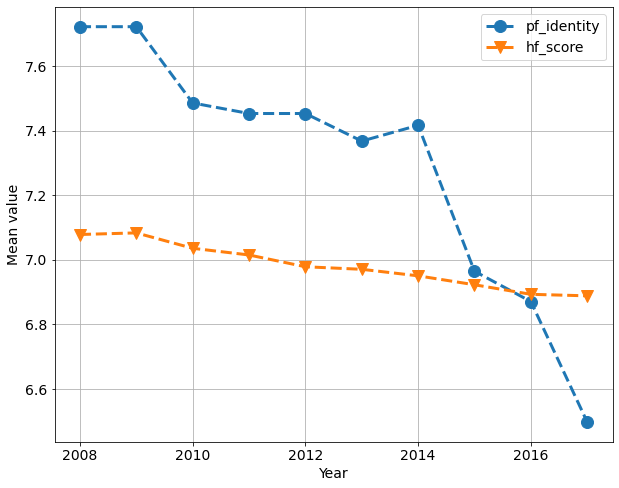

In [11]:
plt.figure(figsize=(10,8))
plt.plot(mean_by_years.year, mean_by_years.pf_identity, '--o', label='pf_identity',linewidth=3, markersize=12)
plt.plot(mean_by_years.year, mean_by_years.hf_score,'--v', label='hf_score',linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

    2) Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
    

In [12]:
mean_by_region_years_pf_identity = dataset.groupby(['region','year'])[['pf_identity']].mean()
mean_by_region_years_pf_identity.reset_index(inplace=True)
mean_by_region_years_pf_identity

,region,year,pf_identity
0,Caucasus & Central Asia,2008,9.040000
1,Caucasus & Central Asia,2009,9.040000
2,Caucasus & Central Asia,2010,9.000000
3,Caucasus & Central Asia,2011,8.166667
4,Caucasus & Central Asia,2012,8.166667
...,...,...,...
95,Western Europe,2013,9.933333
96,Western Europe,2014,9.933333
97,Western Europe,2015,9.400000
98,Western Europe,2016,9.400000


In [13]:
mean_by_region_years_hf_score = dataset.groupby(['region','year'])[['hf_score']].mean()
mean_by_region_years_hf_score.reset_index(inplace=True)
mean_by_region_years_hf_score

,region,year,hf_score
0,Caucasus & Central Asia,2008,6.980000
1,Caucasus & Central Asia,2009,6.974000
2,Caucasus & Central Asia,2010,6.890000
3,Caucasus & Central Asia,2011,6.763333
4,Caucasus & Central Asia,2012,6.841667
...,...,...,...
95,Western Europe,2013,8.412222
96,Western Europe,2014,8.470000
97,Western Europe,2015,8.450556
98,Western Europe,2016,8.420556


In [14]:
mean_by_region_years = dataset.groupby(['region','year'])[['pf_identity', 'hf_score']].mean()
mean_by_region_years.reset_index(inplace=True)

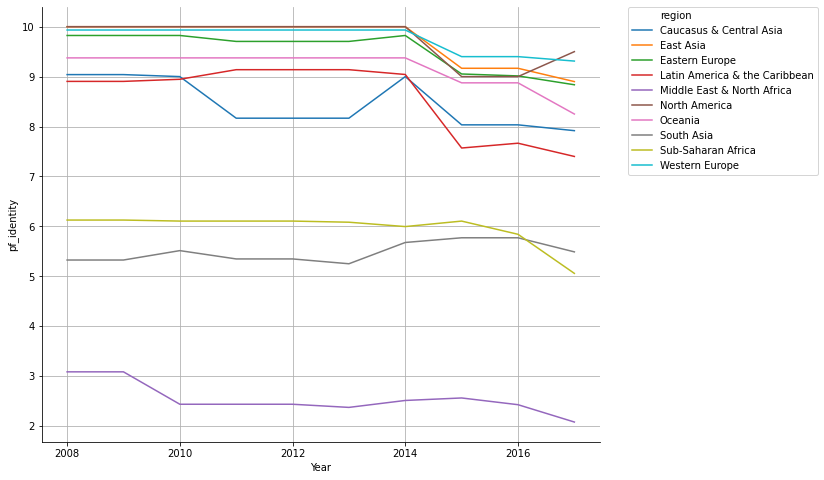

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(x="year", y="pf_identity",
             hue="region",
             markers=True, dashes=False, data=mean_by_region_years)

plt.grid(True)
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

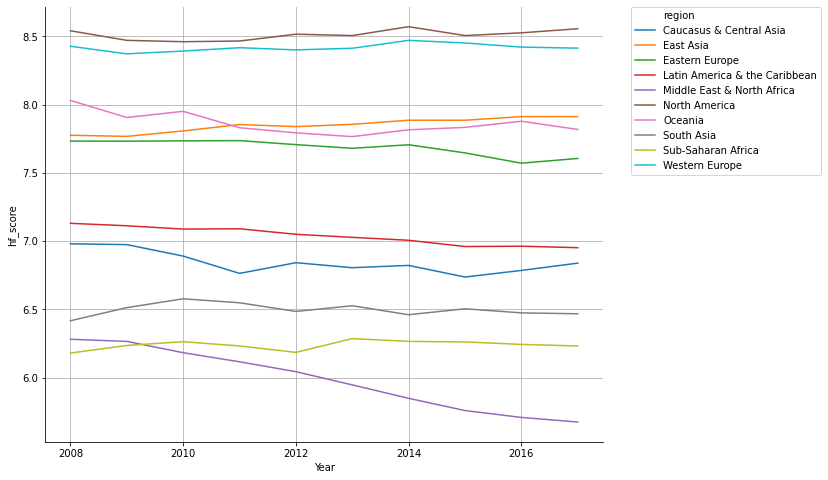

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot(x="year", y="hf_score",
             hue="region",
             markers=True, dashes=False, data=mean_by_region_years)

plt.grid(True)
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

- (pf_identity) La tendencia de cada region se asimila a la tendencia global, se puede ver una gran caida a partir del 2014 en casi todas las regiones de mayor puntaje por igual. 
- (hf_score) La tendencia no es lo mismo para cada region que para la tendencia global, la mayoria se mantienen constantes pero debido a la gran caida progresiva de la tendendia para medio este y norte de africa, la tendencia lgobal se ve muy afecatad 

    3) Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

In [17]:
mean_by_latam_country_years = dataset[dataset['region'] == 'Latin America & the Caribbean'].groupby(['countries','year'])[['pf_identity']].mean()
mean_by_latam_country_years.reset_index(inplace=True)
mean_latam = mean_by_region_years[mean_by_region_years['region'] == 'Latin America & the Caribbean']

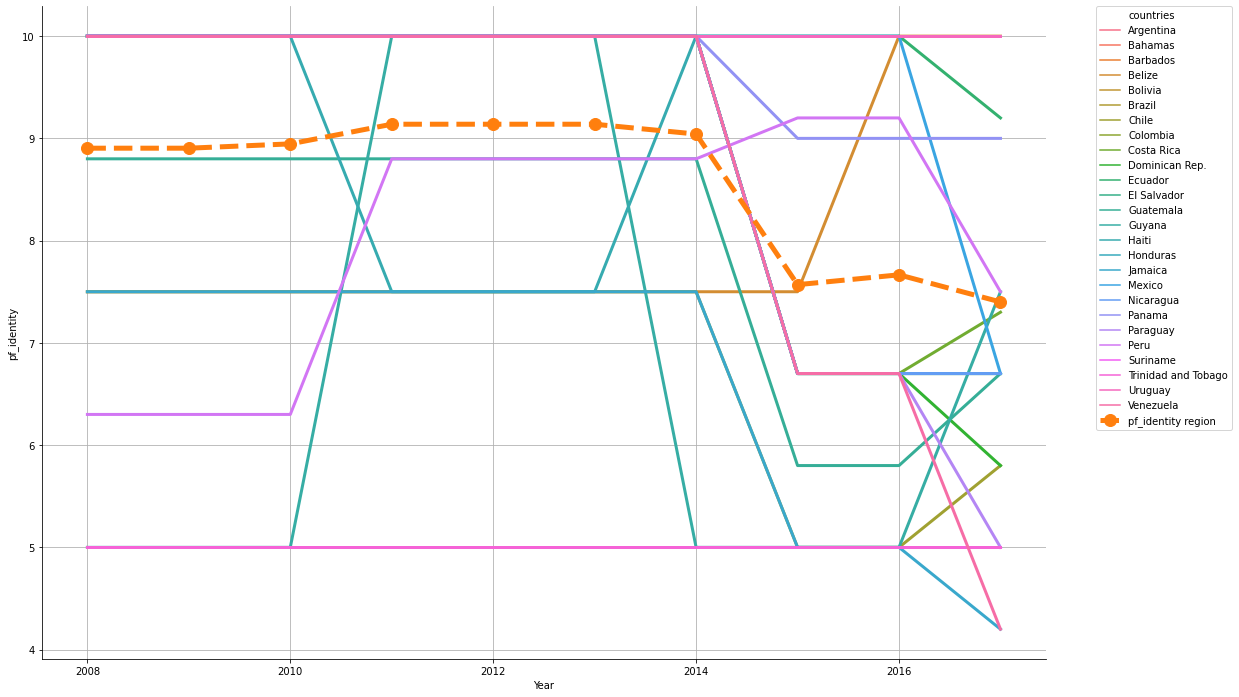

In [18]:
plt.figure(figsize=(18,12))
sns.lineplot(x="year", y="pf_identity",
             hue="countries", lw=3,
             markers=True, dashes=False, data=mean_by_latam_country_years)
plt.plot( mean_latam.year, mean_latam.pf_identity, '--o', label='pf_identity region',linewidth=5, markersize=12)

plt.grid(True)
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

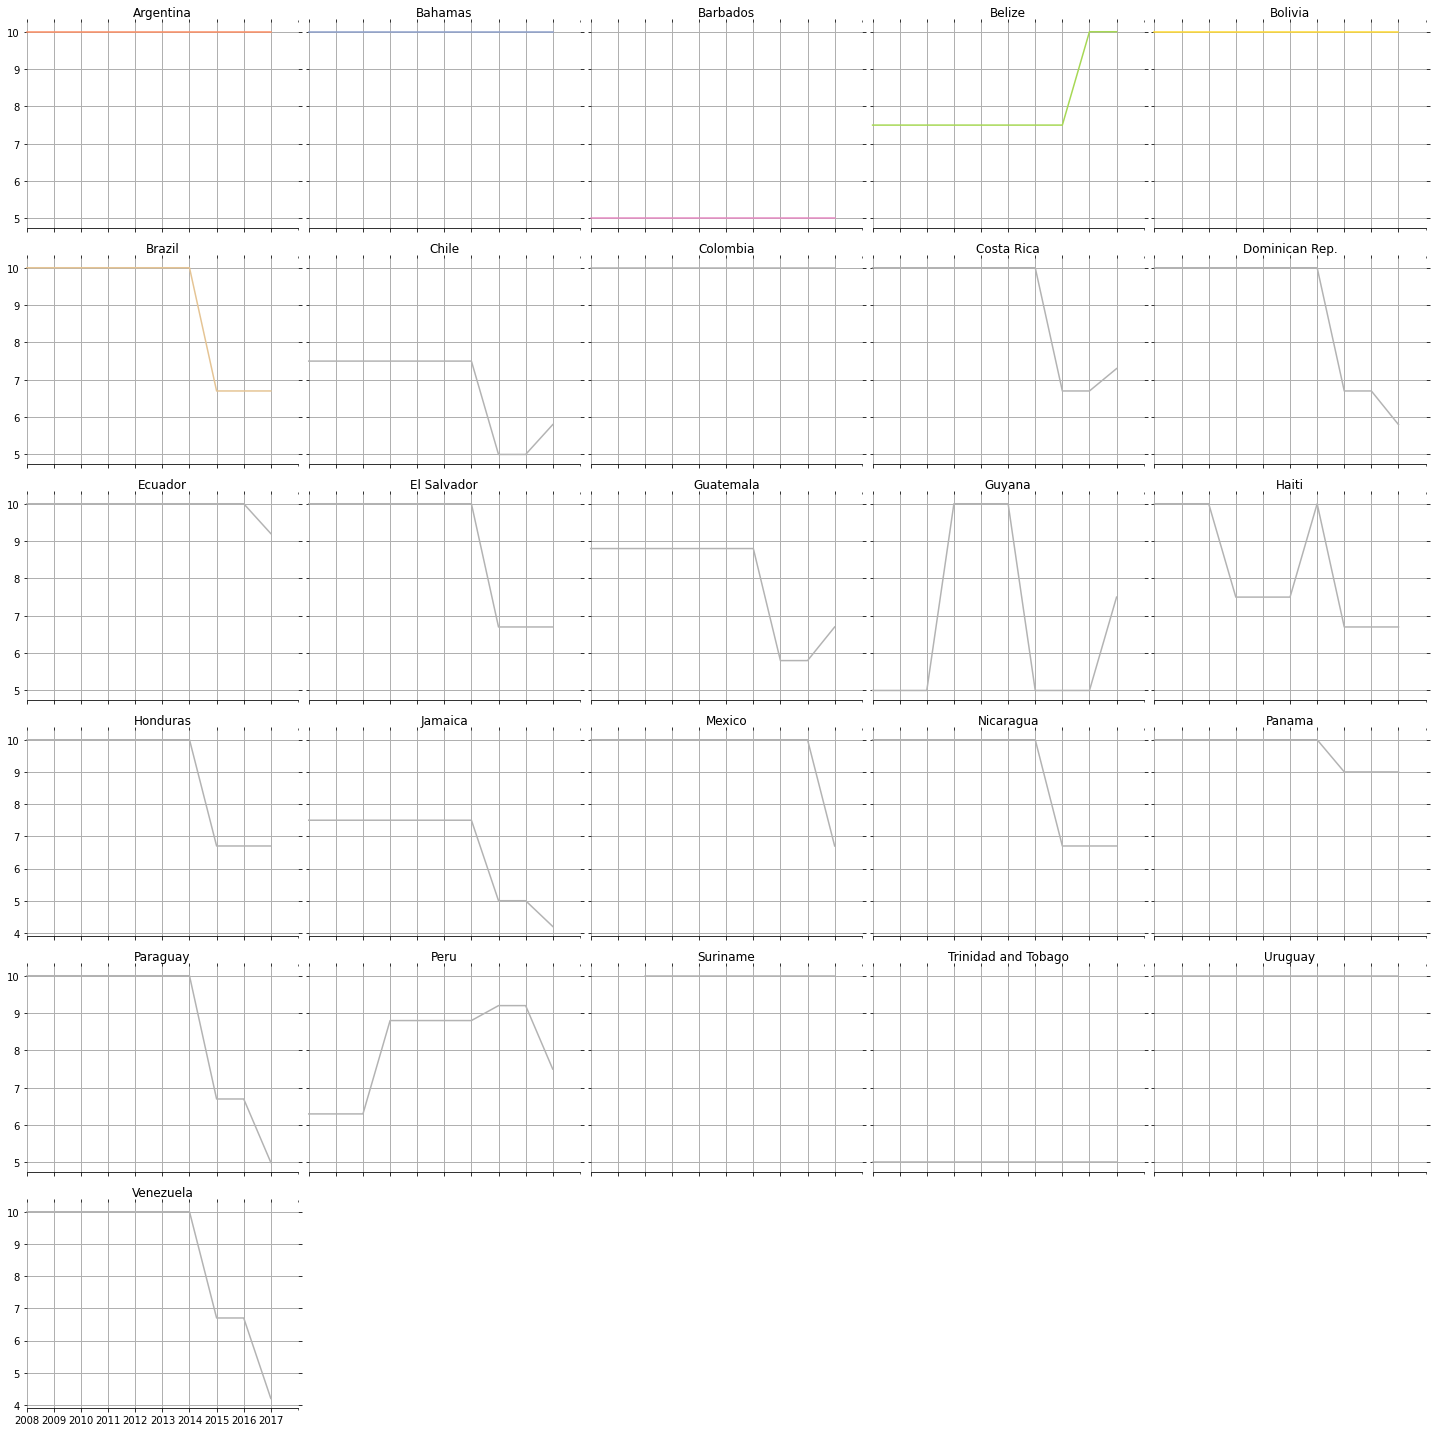

In [19]:
palette = plt.get_cmap('Set2')

# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=6, ncols=5, sharex=True, sharey='row', figsize=(20,20))
axes_list = [item for sublist in axes for item in sublist] 

num=0
for country, selection in mean_by_latam_country_years.groupby('countries'):
    num+=1
    ax = axes_list.pop(0)
    selection.plot('year', 'pf_identity', label=country, color=palette(num), ax=ax, legend=False, clip_on=False)
#     selection.plot(x='year', y='hf_score', label=region, color=palette(num * 2), ax=ax, legend=False, clip_on=False)
    ax.set_title(country)
    ax.tick_params(
        which='both',
        bottom='on',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2018))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2018, 1))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

Hay 2 puntos importantes que nos interesa prestar atencion, el periodo 2010 a 2011 y el 2014 a 2015.

Del año 2010 a 2011, los responsables del cambio de la tendencia fueron Peru y Guayana (aumento valor) y Haiti (disminuye valor)

A partir del 2014, brazil, chile, costa rica, rep dominicana, el salvador, guatemala, .. . etc? disminuye considerablemente su valor

* Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

In [20]:
hf_ef_score_df = dataset.groupby(['year'])[['year','ef_score', 'hf_score']].mean()

(array([6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 ]),
 <a list of 9 Text major ticklabel objects>)

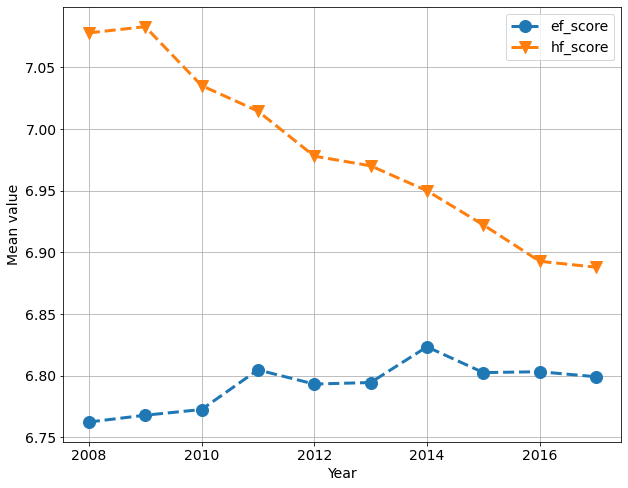

In [21]:
plt.figure(figsize=(10,8))
plt.plot(hf_ef_score_df.year, hf_ef_score_df.ef_score, '--o', label='ef_score',linewidth=3, markersize=12)
plt.plot(hf_ef_score_df.year, hf_ef_score_df.hf_score,'--v', label='hf_score',linewidth=3, markersize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylabel('Mean value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Aunque pareciera que la tendencia de economic freedom tiene (...) positivo, no impacta lo suficiente en el score de human freedom, que parece ser que tiene otros factores que pueden estar afectandola negativamente. Una hipotesis puede ser que en la gente pesa mas el factor de personal freedom mas que economic freedom.

# Correlaciones

1. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

Pearson
* "The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution."

Spearman
* "Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. Further, the two variables being considered may have a non-Gaussian distribution."

Kendall-Tau
* ""

In [22]:
!pip3 install scipy

You should consider upgrading via the '/home/bruno/Documents/diplodatos/venv/bin/python -m pip install --upgrade pip' command.


In [28]:
dataset[['pf_identity','pf_score','ef_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pf_identity  1540 non-null   float64
 1   pf_score     1540 non-null   float64
 2   ef_score     1540 non-null   float64
dtypes: float64(3)
memory usage: 38.1 KB


In [27]:
dataset[['pf_identity','pf_score','ef_score']].describe()

,pf_identity,pf_score,ef_score
count,1540.000000,1540.000000,1540.000000
mean,7.280649,7.163409,6.792981
std,3.181577,1.392409,0.906827
min,0.000000,2.220000,2.580000
25%,5.000000,6.147500,6.220000
50%,8.800000,7.145000,6.880000
75%,10.000000,8.380000,7.440000
max,10.000000,9.560000,9.110000


In [30]:
dataset[['pf_identity','pf_score','ef_score']].sample(10)

,pf_identity,pf_score,ef_score
313,2.5,6.11,7.31
292,7.5,6.33,5.69
1551,10.0,8.19,6.01
262,9.0,7.74,6.94
1255,10.0,9.00,7.11
1020,5.0,5.28,5.25
643,10.0,6.03,2.96
401,9.0,6.40,7.14
187,8.8,7.28,7.38
485,5.0,5.32,6.13


In [139]:
dataset[dataset['pf_score'] < 0.5].describe()

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizando todo el dataset, quitando solo los valores NaN

In [67]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [147]:
df = dataset[['year','pf_identity','pf_score','ef_score']].dropna().sort_values('pf_identity')
#  df = df[df['pf_identity'] < 0.5] TENER EN CUENTA QUE HAY 100 FILAS CON PF_IDENTITY = 0 y PF_SCORE != 0
df

,year,pf_identity,pf_score,ef_score
95,2017,0.0,4.83,6.11
774,2013,0.0,4.47,6.40
122,2017,0.0,5.24,7.07
284,2016,0.0,5.26,7.21
288,2016,0.0,4.39,6.44
...,...,...,...,...
1012,2011,10.0,9.02,7.48
1013,2011,10.0,9.47,7.82
1014,2011,10.0,7.07,6.94
999,2011,10.0,9.26,8.00


In [148]:
spearman_p = spearmanr(df['pf_identity'],df['pf_score'])
spearman_p

SpearmanrResult(correlation=0.7313581415245098, pvalue=6.2822504661055415e-258)

In [149]:
spearman_p = spearmanr(df['pf_identity'],df['ef_score'])
spearman_p

SpearmanrResult(correlation=0.40077737030068, pvalue=1.6873618909139198e-60)

Se necesita que este ordenado el dataset?

Agruparemos la informacion por año

In [150]:
for year in range(2008,2017):
    corr, p = spearmanr(df[df['year'] == year]['pf_identity'],df[df['year'] == year]['pf_score'])
    print('- Year {}, corr: {} p-val: {}'.format(year,corr,p))

- Year 2008, corr: 0.7427268454669634 p-val: 5.548903487584818e-26
- Year 2009, corr: 0.7285212162335368 p-val: 1.3414182331296828e-24
- Year 2010, corr: 0.7552146736822329 p-val: 1.705212799419602e-29
- Year 2011, corr: 0.7435479162055434 p-val: 3.5187309103481623e-28
- Year 2012, corr: 0.7487105612283186 p-val: 9.409783747303183e-29
- Year 2013, corr: 0.7618068902350758 p-val: 4.966288474232245e-31
- Year 2014, corr: 0.7290340572947165 p-val: 1.229018100182041e-27
- Year 2015, corr: 0.7197043947716425 p-val: 1.1604872445839703e-26
- Year 2016, corr: 0.7225352937998358 p-val: 1.9408483020804868e-27


In [151]:
for year in range(2008,2017):
    corr, p = spearmanr(df[df['year'] == year]['pf_identity'],df[df['year'] == year]['ef_score'])
    print('- Year {}, corr: {} p-val: {}'.format(year,corr,p))

- Year 2008, corr: 0.45170397892711045 p-val: 1.8861762125679063e-08
- Year 2009, corr: 0.4525745399912372 p-val: 1.7576419842907807e-08
- Year 2010, corr: 0.4058899427205557 p-val: 1.9374471533821577e-07
- Year 2011, corr: 0.421959179027913 p-val: 5.559805826615896e-08
- Year 2012, corr: 0.43307720034121017 p-val: 2.25444804392254e-08
- Year 2013, corr: 0.4188177050016219 p-val: 4.7908106006208337e-08
- Year 2014, corr: 0.40669398113645916 p-val: 1.0405018441114918e-07
- Year 2015, corr: 0.37707092650414276 p-val: 9.620816930702083e-07
- Year 2016, corr: 0.3914888302862514 p-val: 2.5858974526690184e-07
